In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
directory = 'bert/'
dataframes = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Merge the DataFrames into a single DataFrame (concatenate in this case)
merged_df = pd.concat(dataframes, ignore_index=True)
pd.set_option('display.max_colwidth', None)

def literal_eval_column(column):
    try:
        return ast.literal_eval(column)
    except (SyntaxError, ValueError):
        return column

merged_df = merged_df.applymap(literal_eval_column)

In [32]:
gold = pd.read_csv('20newsgroups_test.csv', encoding='utf-8')

def compare_pred(row):
    return 1 if row['label_pred'] == gold['label_text'][row.index] else 0

merged_df['label_gold'] = gold['label_text']
merged_df['correct'] = merged_df.label_gold == merged_df.label_pred


In [ ]:
# split df into 20 groups

In [34]:
merged_df

,Unnamed: 0,label_pred,score,tokens,attributions,0,pred_gold,label_gold,correct
0,0,rec.autos,0.875687,"[i, am, a, little, confused, on, all, of, the, models, of, the, 88, -, 89, bonn, ##eville, ##s, ., i, have, heard, of, the, le, se, l, ##se, ss, ##e, ss, ##ei, ., could, someone, tell, me, the, differences, are, far, as, features, or, performance, ., i, am, also, curious, to, know, what, the, book, value, is, for, prefer, ##ea, ##bly, the, 89, model, ., and, how, much, less, than, book, value, can, you, usually, get, them, for, ., in, other, words, how, much, are, they, in, demand, this, time, of, year, ., i, have, heard, that, the, mid, -, ...]","[-0.08908338556650067, -0.033628758325078466, 0.0327391846348219, 0.0060067086919287985, -0.002997646346093595, -0.030839282143392176, 0.036633896384467166, 0.0022453891688301096, 0.07994663131318692, -0.279897063614766, -0.006998789462455057, 0.06365474313057846, -0.06782965415689308, 0.036819210306744614, -0.040163720012940475, 0.14674863789576645, 0.41854263729401936, 0.046593944500917764, 0.07433242710603863, -0.02692663030270621, -0.019349686402843014, 0.026544909407153965, 0.01737957425661817, 0.04161893817036166, -0.03353516194856167, -0.015473681448309809, 0.034927731469788004, 0.0428765108977458, -0.002026433821214951, 0.04082132542190673, 0.03415385974760196, -0.03474059186548935, 0.06164815772616627, -0.017548145937788466, -0.005716809549337028, -0.012043922828931655, 0.028344597931712286, 0.01588452958595729, -0.031031195352001367, 0.015618605706198782, -0.02987449689087118, -0.0115527738690672, -0.017925366433192494, -0.051134096383909686, 0.2559614261441739, 0.07522423636136402, -0.0324786870053675, 0.014065773433979266, -0.014304131258160333, 0.005525564888888326, 5.768544535548435e-05, -0.029037759716504265, 0.000618594080641577, 0.008481713850636185, -0.06602031784454976, 0.003573078780828357, 0.006775256537170386, -0.01764349154126501, -0.016041694777195498, 0.0027348966330907453, 0.020794886232316716, -0.0012036675202389958, 0.018404269678989567, -0.019569860891170875, 0.004106690299130148, -0.00950471623127874, 0.008839469588633145, -0.0040817902831023515, -0.0009964080930735752, 0.0009054371736662007, -0.02105350696044757, 0.039493656802368285, -0.0029586970963134448, -0.018193077993288693, 0.016648631486939718, 0.008884371827812163, 0.010118857379905187, -0.0023522025731023536, 0.05743523988452197, -0.013693531870999342, -0.0030023923071442688, -0.03512471738134086, 0.0097562930839406, -0.006996721024367129, 0.0025183242757828884, -0.015079710715463452, 0.010515331287046866, 0.018243823757817534, 0.008977295830828734, -0.011596445844060912, 0.0202886809754796, 0.049703736535580606, 0.04751148254992056, -0.021296673957289448, -0.009013629324913024, -0.01373632682056484, 0.01740226545660541, 0.035529468296002065, 0.025263613646011464, 0.010151649397903976, ...]",NaN,rec.autos,rec.autos,True
1,0,comp.windows.x,0.878905,"[i, ', m, not, familiar, at, all, with, the, format, of, these, "", x, -, face, :, "", thing, ##ies, ,, but, after, seeing, them, in, some, folks, ', header, ##s, ,, i, ', ve, *, got, *, to, *, see, *, them, (, and, maybe, make, one, of, my, own, ), !, i, ', ve, got, "", d, ##pg, -, view, "", on, my, linux, box, (, which, displays, "", un, ##com, ##pressed, x, -, faces, "", ), and, i, ', ve, managed, to, com, ##pile, [, un, ], com, ##pf, ##ace, too, ., ., ., but, now, that, ...]","[-0.16000796394638991, 0.001991805572722242, 0.013379850406531587, 0.011703799237078613, 0.019067801959107938, 0.010041291529494496, 0.0012328932093685569, 0.0013989187760676475, 0.014811214754641913, 0.0473427722767122, -0.0041829418653975, -0.016165691568140583, 0.03183350696402353, 0.09267933406908835, 0.0035964989100736866, 0.010389283156093833, -0.02380861025779357, 0.004723001566246335, 0.01796859615570571, 0.0022476092562143325, 0.008679523751921976, 0.005755589166641978, 0.010881266639884504, -0.012180688195001036, 0.006009976445194796, -0.0022116511315639444, -0

In [24]:
def plot_instance(row, output=''):
    a = pd.Series(row['attributions'].tolist()[0], row['tokens'].tolist()[0])
    a.plot.barh(figsize=(10,20))
    if output:
         plt.savefig(f'{output}/{str(row.index[0])}.png', bbox_inches='tight')

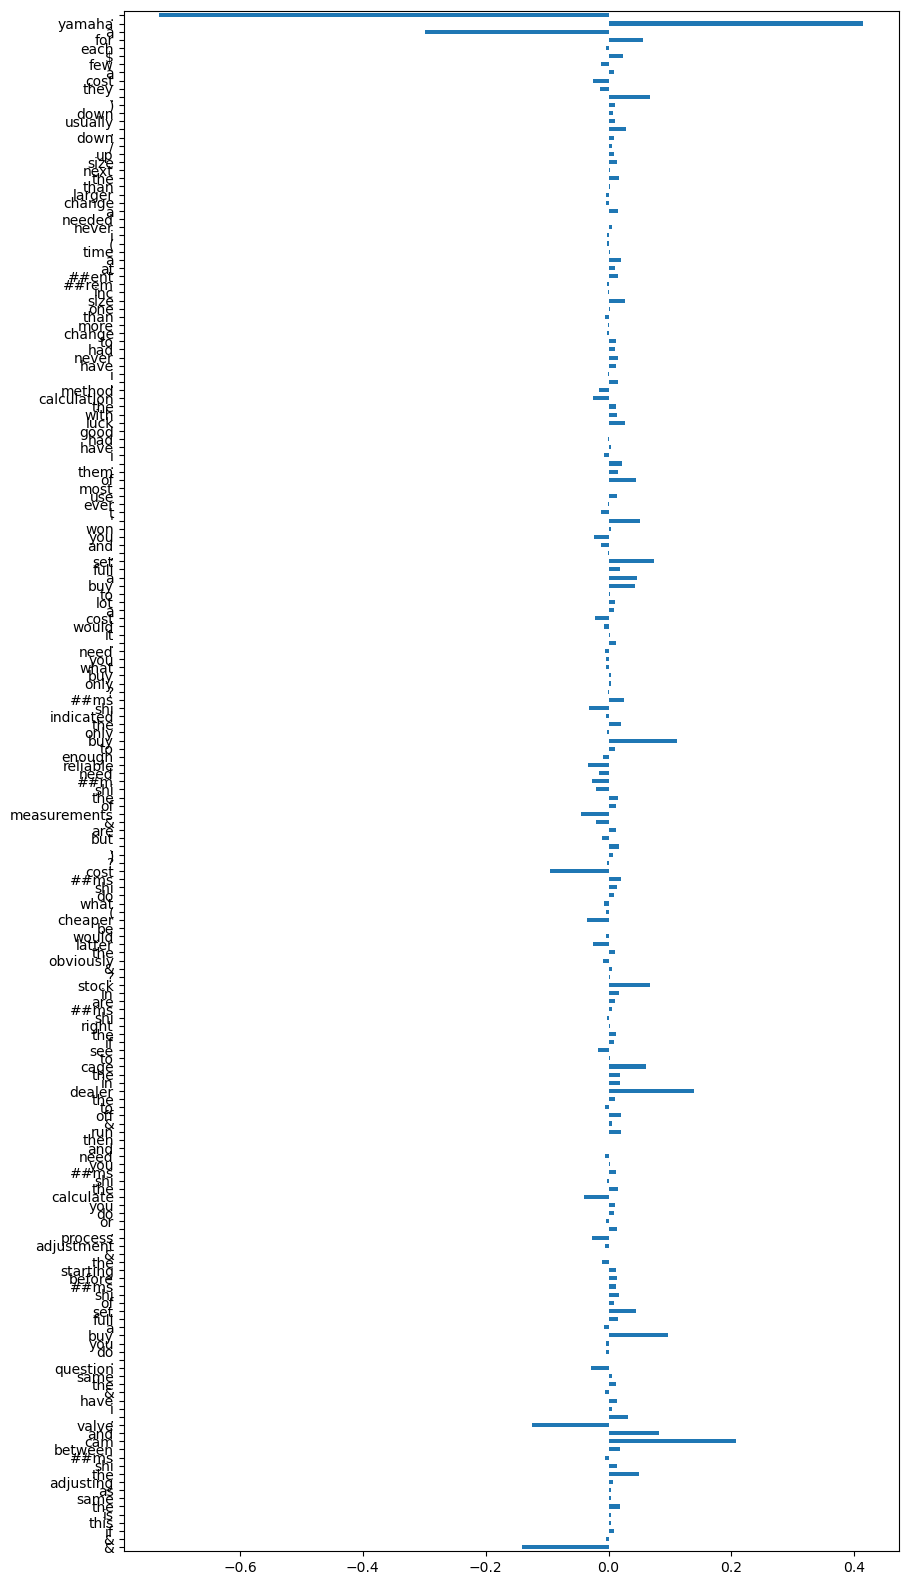

In [27]:
plot_instance(merged_df.iloc[[634]], output='viz-bert')

In [92]:
len(vocab_attributions)

7765

In [91]:
sorted_dict = dict(sorted(vocab_attributions.items(), key=lambda item: len(item[1]), reverse=True))

['!',
 '"',
 '#',
 '##0',
 '##00',
 '##01',
 '##1',
 '##10',
 '##100',
 '##11',
 '##12',
 '##13',
 '##15',
 '##16',
 '##17',
 '##18',
 '##19',
 '##2',
 '##20',
 '##200',
 '##21',
 '##22',
 '##23',
 '##24',
 '##25',
 '##26',
 '##27',
 '##29',
 '##3',
 '##30',
 '##31',
 '##32',
 '##33',
 '##35',
 '##36',
 '##37',
 '##38',
 '##39',
 '##4',
 '##40',
 '##400',
 '##42',
 '##45',
 '##46',
 '##48',
 '##5',
 '##50',
 '##55',
 '##6',
 '##60',
 '##64',
 '##66',
 '##7',
 '##70',
 '##75',
 '##8',
 '##85',
 '##86',
 '##9',
 '##90',
 '##a',
 '##ab',
 '##abas',
 '##ability',
 '##able',
 '##ably',
 '##aby',
 '##ac',
 '##ace',
 '##ach',
 '##achi',
 '##ack',
 '##acker',
 '##act',
 '##acy',
 '##ad',
 '##adi',
 '##age',
 '##aged',
 '##ah',
 '##ain',
 '##ak',
 '##ake',
 '##aking',
 '##al',
 '##ala',
 '##ale',
 '##all',
 '##ally',
 '##als',
 '##am',
 '##ame',
 '##ami',
 '##amina',
 '##amo',
 '##amp',
 '##an',
 '##ance',
 '##ances',
 '##ancy',
 '##and',
 '##ane',
 '##ang',
 '##anna',
 '##ano',
 '##ans',
 '##a

In [90]:
vocab_attributions = dict()

for i, row in merged_df.iterrows():
    if type(row['tokens']) == float:
        continue
    print(type(row['tokens']), row['tokens'])
    for i, token in enumerate(row['tokens']):
        if token in vocab_attributions:
            vocab_attributions[token].append(row['attributions'][i])
        else:
            vocab_attributions[token] = [row['attributions'][i]]

<class 'list'> ['i', 'am', 'a', 'little', 'confused', 'on', 'all', 'of', 'the', 'models', 'of', 'the', '88', '-', '89', 'bonn', '##eville', '##s', '.', 'i', 'have', 'heard', 'of', 'the', 'le', 'se', 'l', '##se', 'ss', '##e', 'ss', '##ei', '.', 'could', 'someone', 'tell', 'me', 'the', 'differences', 'are', 'far', 'as', 'features', 'or', 'performance', '.', 'i', 'am', 'also', 'curious', 'to', 'know', 'what', 'the', 'book', 'value', 'is', 'for', 'prefer', '##ea', '##bly', 'the', '89', 'model', '.', 'and', 'how', 'much', 'less', 'than', 'book', 'value', 'can', 'you', 'usually', 'get', 'them', 'for', '.', 'in', 'other', 'words', 'how', 'much', 'are', 'they', 'in', 'demand', 'this', 'time', 'of', 'year', '.', 'i', 'have', 'heard', 'that', 'the', 'mid', '-', 'spring', 'early', 'summer', 'is', 'the', 'best', 'time', 'to', 'buy', '.']
<class 'list'> ['i', "'", 'm', 'not', 'familiar', 'at', 'all', 'with', 'the', 'format', 'of', 'these', '"', 'x', '-', 'face', ':', '"', 'thing', '##ies', ',', 'bu